# ==== Lecture 1a ====

See [associated slides here](https://docs.google.com/presentation/d/10jIMtijymES4eRmRDJQm4hWI1XM2-ep526gk1JRVZYA/edit).

Content by Alex Krentsel, based on Barak Boaz and Daniel Kang's lecture materials.

## Welcome to JamCoders 2025!

You will be learning how to write _code_ in week 1. Code are instructions for the computer: the computer will do exactly what you tell it to do.

# What can you do with code?

Building the next famous website takes a while. Quick demo we can do now in 10 minutes: image filters.

You will not be able to understand this code right now. By the middle of next week, you'll be able to do this too...



In [1]:
# @title SECRET – Setting up some code
"""
SimpleImage is a module written for AddisCoder 2023 by Alexander Krentsel,
and is heavily based on the SimpleImage module written for CS106A at Stanford
University, but has been modified to simplify the interface for students
and better handle working with small canvases.

For students: do not worry yet about what is in this file. For now, you
can think of SimpleImage as a custom complex type that we have created for
you. We will not discuss how to create custom types (called "classes")
during AddisCoder, but you will learn about them in a future

SimpleImage Features:
Create image:
  image = SimpleImage.blank(400, 200)   # create new image of size
  image = SimpleImage('foo.jpg')        # create from file

Access size:
  image.width, image.height

Get pixel at x,y (0,0 is the top left corner):
  pix = image.get_rgb(x, y)
  # pix is an RGB list like [100, 200, 0], where the color components of the
  # pixel are Red = 100, Green = 200, and Blue = 0.

Set pixel at x,y:
  image.set_rgb(x, y, r, g, b)

Show image on screen:
  image.show()

Show a small image zoomed-in (larger) so it's easier to see the pixels:
  image.show(resize_width=400)

The main() function below demonstrates the above functions.
"""

import sys
# If the following line fails, "Pillow" needs to be installed. Ask your
# TA for help.
from PIL import Image


def clamp(num):
    """
    Return a "clamped" version of the given num,
    converted to be an int limited to the range 0..255.
    """
    num = int(num)
    if num < 0:
        return 0
    if num >= 256:
        return 255
    return num


# color tuples for background color names 'red' 'white' etc.
BACK_COLORS = {
    'white': (255, 255, 255),
    'black': (0, 0, 0),
    'red': (255, 0, 0),
    'green': (0, 255, 0),
    'blue': (0, 0, 255),
}


class SimpleImage(object):
    def __init__(self, filename, width=0, height=0, back_color=None):
        """
        Create a new image. This case works: SimpleImage('foo.jpg')
        To create a blank image use SimpleImage.blank(500, 300)
        The other parameters here are for internal/experimental use.
        """
        # Create pil_image either from file, or making blank
        if filename:
            self.pil_image = Image.open(filename).convert("RGB")
            if self.pil_image.mode != 'RGB':
                raise Exception('Image file is not RGB')
            self._filename = filename  # hold onto
        else:
            if not back_color:
                back_color = 'white'
            color_tuple = BACK_COLORS[back_color]
            if width == 0 or height == 0:
                raise Exception('Creating blank image requires width/height but got {} {}'
                                .format(width, height))
            self.pil_image = Image.new('RGB', (width, height), color_tuple)
        self.px = self.pil_image.load()
        size = self.pil_image.size
        self._width = size[0]
        self._height = size[1]
        self.curr_x = 0
        self.curr_y = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self.curr_x < self.width and self.curr_y < self.height:
            x = self.curr_x
            y = self.curr_y
            self.increment_curr_counters()
            return self.get_rgb(x, y)
        else:
            self.curr_x = 0
            self.curr_y = 0
            raise StopIteration()

    def increment_curr_counters(self):
        self.curr_x += 1
        if self.curr_x == self.width:
            self.curr_x = 0
            self.curr_y += 1

    @classmethod
    def blank(cls, width, height, back_color=None):
        """Create a new blank image of the given width and height, optional back_color."""
        return SimpleImage('', width, height, back_color=back_color)

    @classmethod
    def file(cls, filename):
        """Create a new image based on a file, alternative to raw constructor."""
        return SimpleImage(filename)

    @property
    def width(self):
        """Width of image in pixels."""
        return self._width

    @property
    def height(self):
        """Height of image in pixels."""
        return self._height

    def set_rgb(self, x, y, red, green, blue):
        """
        Set the pixel at the given x,y to have
        the given red/green/blue values without
        requiring a separate pixel object.
        """
        self.px[x, y] = (red, green, blue)

    def get_rgb(self, x, y):
        """
        Returns a list of [red, green, blue] values
        for the pixel at the given x,y.
        """
        return list(self.px[x, y])

    def show(self, resize_width=None):
        """Displays the image using an external utility. Blows up the image if it is too small."""

        if resize_width is not None:
            # if a resize_width is specified, resize the image before displaying.
            new_img = self.pil_image.resize((resize_width, int((float(resize_width) / self.width) * self.height)), Image.Resampling.BOX)
            display(new_img)
            return

        display(self.pil_image)


def main():
    """
    main() exercises the features as a test.
    1. With 1 arg like `images/castle.jpeg` - opens it
    2. With 0 args, creates a yellow square with
    a green stripe at the right edge.
    """
    args = sys.argv[1:]
    if len(args) == 1:
        image = SimpleImage.file(args[0])
        image.show()
        return

    # Create yellow rectangle.
    image = SimpleImage.blank(400, 200)
    for x in range(image.width):
        for y in range(image.height):
            image.set_rgb(x, y, 255, 255, 0)

    # Set green stripe.
    pixel = image.get_rgb(0, 0)
    green = pixel[1]  # [r, g, b]
    for x in range(image.width - 10, image.width):
        for y in range(image.height):
            image.set_rgb(x, y, 0, green, 0)
    image.show()


# if __name__ == '__main__':
    # main()

# Download images
import requests
def save_image(url, filename):
    response = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(response.content)
    print(f"Downloaded {filename}")

# mystery-image1.jpg: Devon House
save_image('https://couplesresorts.co.uk/wp-content/uploads/2019/01/Top-5-famous-landmarks-in-Jamaica.jpg', 'mystery-image1.jpg')
# mystery-image2.jpg: Blue Hole
save_image('https://www.nexustours.com/images/upload/services/12229_Blue-Hole_Dunns_River/12229_Blue-Hole-_and_-Dunn_squot_s-River1.jpg', 'mystery-image2.jpg')
# mystery-image3.jpg: Ronaldo
save_image('https://www.worldsoccer.com/wp-content/uploads/sites/13/2018/06/GettyImages-975491188-596x400-1.jpg', 'mystery-image3.jpg')

print("Setup complete – image files locally available for reading.")

Downloaded mystery-image1.jpg
Downloaded mystery-image2.jpg
Downloaded mystery-image3.jpg
Setup complete – image files locally available for reading.


## What you'll be able to do in less than two weeks

Power of computer science...

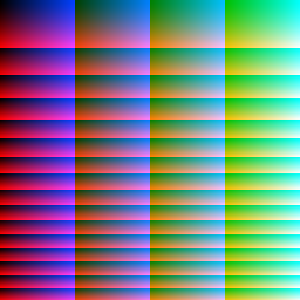

In [12]:
# Gradient Canvases
canvas_gradient = SimpleImage.blank(256, 256)


for row in range(canvas_gradient.height):
    for col in range(canvas_gradient.width):
      r = int((row ** 1.5) % 256)
      g = col
      b = (col * 4) % 256
      canvas_gradient.set_rgb(col, row, r, g, b)


# show the image
canvas_gradient.show(resize_width=300)

In [13]:
# Real world images
mystery_image1 = SimpleImage("mystery-image1.jpg")
mystery_image2 = SimpleImage("mystery-image2.jpg")
mystery_image3 = SimpleImage("mystery-image3.jpg")

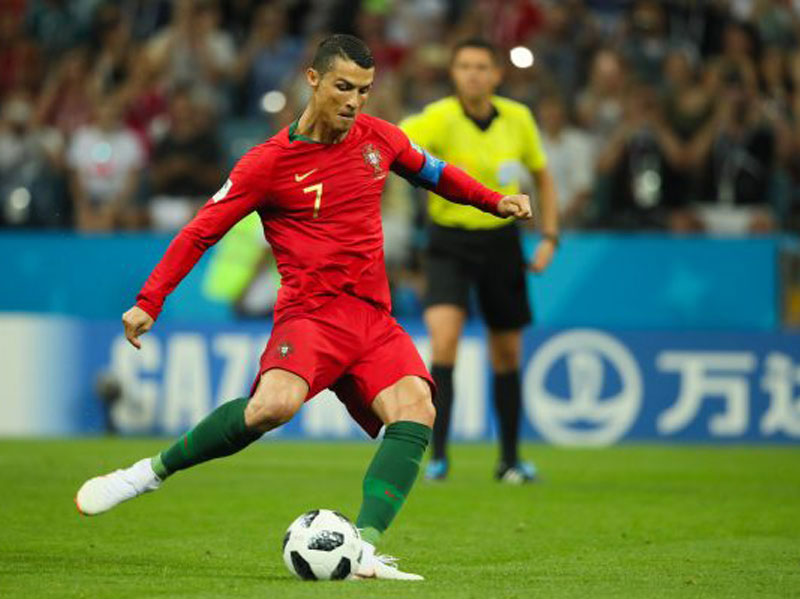

In [14]:
mystery_image3.show()

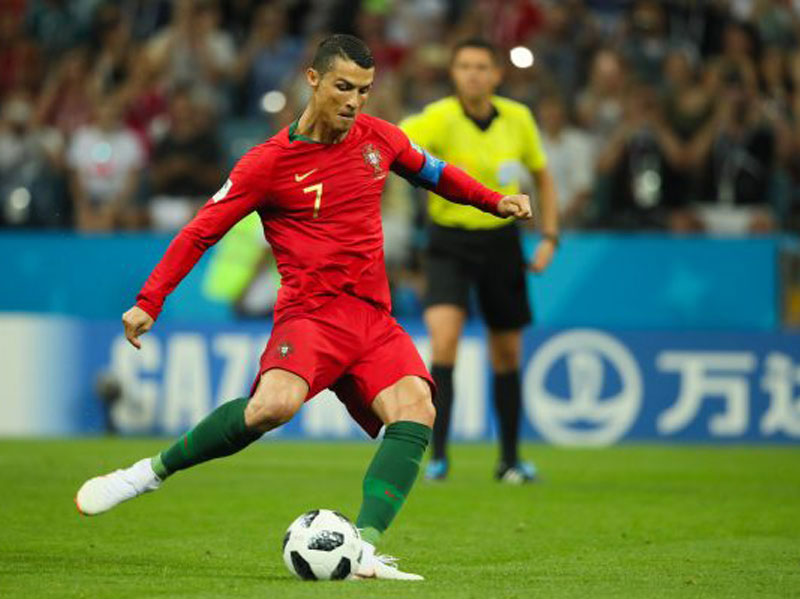

IndexError: image index out of range

In [19]:
# Putting it altogether...

# Let's overlay this as a filter.

def apply_gradient_filter(image):
  filtered_image = SimpleImage.blank(image.width, image.height)
  for col in range(image.width):
    for row in range(image.height):
      new_r = image.get_rgb(row, col)[0]
      new_g = image.get_rgb(row, col)[1]
      new_b = image.get_rgb(row, col)[2]
      filtered_image.set_rgb(col, row, new_r, new_g, new_b)
  return filtered_image

mystery_image3.show()
apply_gradient_filter(mystery_image3).show()
# apply_gradient_filter


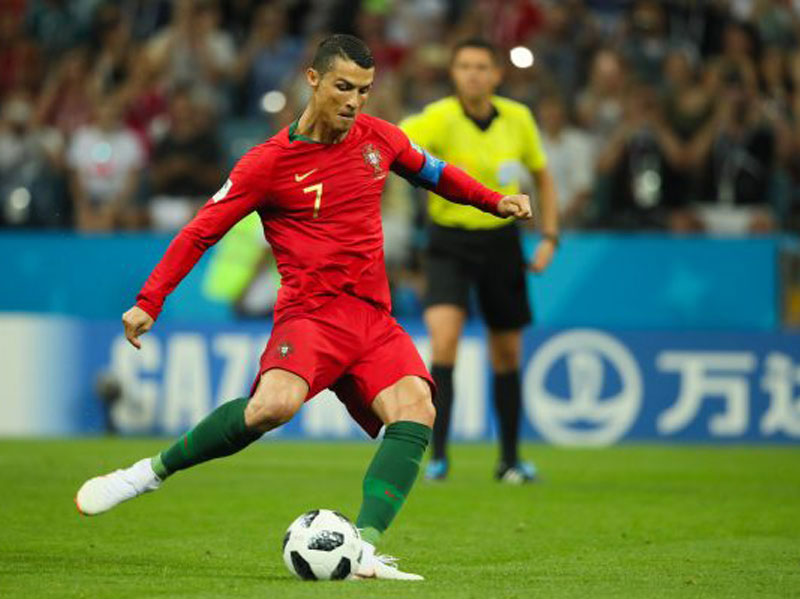

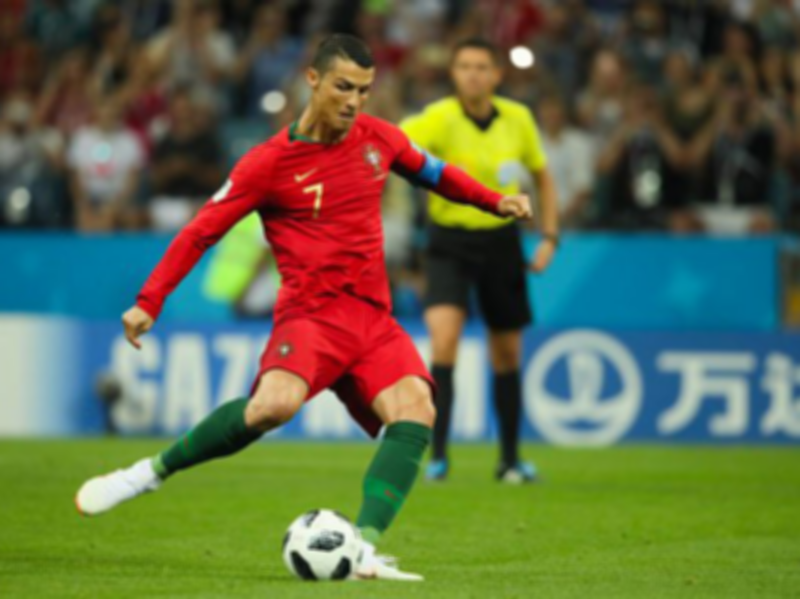

In [20]:
# Filter 1: Blur Effect
# This creates a smooth, dreamy look by averaging nearby pixels

def apply_blur_filter(image):
    """Creates a blur effect by averaging surrounding pixels"""
    filtered_image = SimpleImage.blank(image.width, image.height)
    blur_radius = 2  # How much blur to apply

    for col in range(image.width):
        for row in range(image.height):
            # Collect colors from surrounding pixels
            total_r = total_g = total_b = 0
            count = 0

            # Look at pixels in a square around current pixel
            for dx in range(-blur_radius, blur_radius + 1):
                for dy in range(-blur_radius, blur_radius + 1):
                    new_col = col + dx
                    new_row = row + dy

                    # Make sure we stay within image bounds
                    if 0 <= new_col < image.width and 0 <= new_row < image.height:
                        pixel_rgb = image.get_rgb(new_col, new_row)
                        total_r += pixel_rgb[0]
                        total_g += pixel_rgb[1]
                        total_b += pixel_rgb[2]
                        count += 1

            # Average the colors
            avg_r = total_r // count
            avg_g = total_g // count
            avg_b = total_b // count

            filtered_image.set_rgb(col, row, avg_r, avg_g, avg_b)

    return filtered_image

# Demo the blur filter
mystery_image3.show()
blurred = apply_blur_filter(mystery_image3)
blurred.show()


In [ ]:
# Filter 2: Sketch/Edge Detection
# This finds edges in the image to create a pencil sketch effect

def apply_sketch_filter(image):
    """Creates a pencil sketch effect by detecting edges"""
    filtered_image = SimpleImage.blank(image.width, image.height)

    for col in range(image.width):
        for row in range(image.height):
            # Get current pixel
            current_rgb = image.get_rgb(col, row)
            current_brightness = (current_rgb[0] + current_rgb[1] + current_rgb[2]) // 3

            # Compare with neighbor to find edges
            edge_strength = 0
            if col < image.width - 1 and row < image.height - 1:
                # Check right and bottom neighbors
                right_rgb = image.get_rgb(col + 1, row)
                bottom_rgb = image.get_rgb(col, row + 1)

                right_brightness = (right_rgb[0] + right_rgb[1] + right_rgb[2]) // 3
                bottom_brightness = (bottom_rgb[0] + bottom_rgb[1] + bottom_rgb[2]) // 3

                # Calculate how different the neighbors are
                edge_strength = abs(current_brightness - right_brightness) + abs(current_brightness - bottom_brightness)

            # Convert edge strength to sketch lines
            if edge_strength > 50:  # Strong edge = dark line
                sketch_color = 0
            else:  # Weak edge = light/white
                sketch_color = 255 - (edge_strength * 2)

            filtered_image.set_rgb(col, row, sketch_color, sketch_color, sketch_color)

    return filtered_image

# Demo the sketch filter
mystery_image3.show()
sketch = apply_sketch_filter(mystery_image3)
sketch.show()


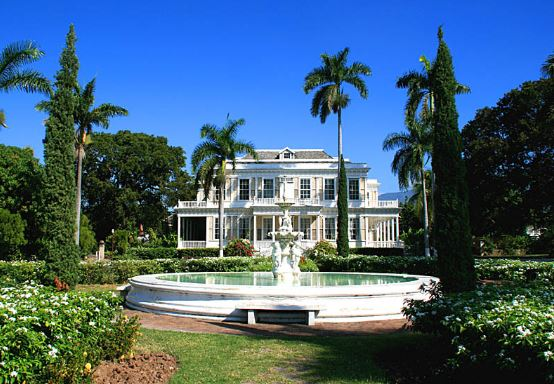

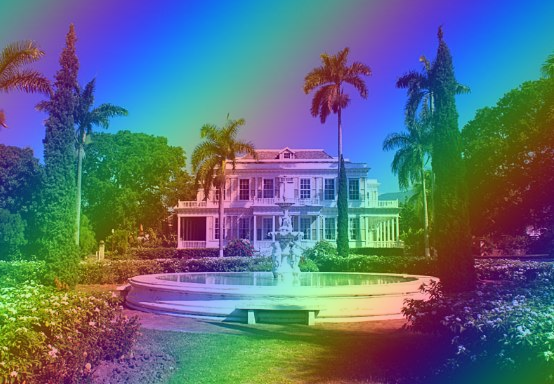

In [22]:
# Filter 3: Rainbow Gradient
# This creates a magical rainbow effect that shifts colors across the image

import math

def apply_rainbow_filter(image):
    """Creates a shimmering rainbow effect using mathematical color transitions"""
    filtered_image = SimpleImage.blank(image.width, image.height)

    for col in range(image.width):
        for row in range(image.height):
            # Get original pixel
            original_rgb = image.get_rgb(col, row)

            # Create rainbow effect based on position
            # Use sine waves to create smooth color transitions
            rainbow_offset = (col + row) * 0.02  # Controls rainbow speed

            # Create RGB values using sine waves (shifted for different colors)
            rainbow_r = int(127 + 127 * math.sin(rainbow_offset))
            rainbow_g = int(127 + 127 * math.sin(rainbow_offset + 2))  # Phase shift
            rainbow_b = int(127 + 127 * math.sin(rainbow_offset + 4))  # Different phase

            # Blend original colors with rainbow (mix 60% original, 40% rainbow)
            final_r = int(original_rgb[0] * 0.6 + rainbow_r * 0.4)
            final_g = int(original_rgb[1] * 0.6 + rainbow_g * 0.4)
            final_b = int(original_rgb[2] * 0.6 + rainbow_b * 0.4)

            # Make sure values stay in valid range
            final_r = max(0, min(255, final_r))
            final_g = max(0, min(255, final_g))
            final_b = max(0, min(255, final_b))

            filtered_image.set_rgb(col, row, final_r, final_g, final_b)

    return filtered_image

# Demo the rainbow filter
mystery_image1.show()
rainbow = apply_rainbow_filter(mystery_image1)
rainbow.show()


In [ ]:
# Filter 4: Vintage Sepia Tone
# This creates a classic old photograph look with warm brown tones

def apply_sepia_filter(image):
    """Creates a vintage sepia tone effect like old photographs"""
    filtered_image = SimpleImage.blank(image.width, image.height)

    for col in range(image.width):
        for row in range(image.height):
            # Get original colors
            original_rgb = image.get_rgb(col, row)
            r, g, b = original_rgb[0], original_rgb[1], original_rgb[2]

            # Apply sepia transformation (standard sepia formula)
            sepia_r = int((r * 0.393) + (g * 0.769) + (b * 0.189))
            sepia_g = int((r * 0.349) + (g * 0.686) + (b * 0.168))
            sepia_b = int((r * 0.272) + (g * 0.534) + (b * 0.131))

            # Make sure values don't exceed 255
            sepia_r = min(255, sepia_r)
            sepia_g = min(255, sepia_g)
            sepia_b = min(255, sepia_b)

            # Add some vintage fade effect (slightly reduce intensity)
            vintage_factor = 0.9
            final_r = int(sepia_r * vintage_factor)
            final_g = int(sepia_g * vintage_factor)
            final_b = int(sepia_b * vintage_factor)

            filtered_image.set_rgb(col, row, final_r, final_g, final_b)

    return filtered_image

# Demo the sepia filter
mystery_image1.show()
sepia = apply_sepia_filter(mystery_image1)
sepia.show()


In [ ]:
# Filter 5: Kaleidoscope Mirror Effect
# This creates a mesmerizing symmetrical pattern by mirroring image sections

def apply_kaleidoscope_filter(image):
    """Creates a kaleidoscope effect with symmetrical mirroring"""
    filtered_image = SimpleImage.blank(image.width, image.height)

    # Find center of image
    center_x = image.width // 2
    center_y = image.height // 2

    for col in range(image.width):
        for row in range(image.height):
            # Calculate distance from center
            dx = col - center_x
            dy = row - center_y

            # Create kaleidoscope effect by mirroring in different quadrants
            # Determine which quadrant we're in and mirror accordingly
            if dx >= 0 and dy >= 0:  # Bottom right - use as is
                source_x = col
                source_y = row
            elif dx < 0 and dy >= 0:  # Bottom left - mirror horizontally
                source_x = center_x + abs(dx)
                source_y = row
            elif dx >= 0 and dy < 0:  # Top right - mirror vertically
                source_x = col
                source_y = center_y + abs(dy)
            else:  # Top left - mirror both ways
                source_x = center_x + abs(dx)
                source_y = center_y + abs(dy)

            # Make sure source coordinates are within bounds
            source_x = max(0, min(image.width - 1, source_x))
            source_y = max(0, min(image.height - 1, source_y))

            # Get the mirrored pixel and apply it
            mirrored_rgb = image.get_rgb(source_x, source_y)

            # Add a slight color shift for extra visual interest
            shift_r = (mirrored_rgb[0] + 20) % 255
            shift_g = mirrored_rgb[1]
            shift_b = (mirrored_rgb[2] + 10) % 255

            filtered_image.set_rgb(col, row, shift_r, shift_g, shift_b)

    return filtered_image

# Demo the kaleidoscope filter
mystery_image1.show()
kaleidoscope = apply_kaleidoscope_filter(mystery_image1)
kaleidoscope.show()


This is cool and all, but we need to work our way up to this.

# Let's get started...

In [25]:
648380173 * 36281

23523881056613

In [26]:
738 * 1001

738738

In [27]:
276 - 25

251

In [29]:
25 * 45

1125

# How to use Jupyter

We will explore complex uses of Python in future lectures. However, for the time being, we will think of Jupyter as a very powerful calculator.

In Jupyter, each computation is performed in a _cell_. We'll demonstrate how to use cells now.

# Note on multiplication:

As we've seen, multiplication is done with `*`. It is NOT done with `x`. This is a common point of confusion. Please keep this in mind

# Important note: shift + enter

In order to run a cell, you must press _shift + enter_. For the time being, only the last line in the cell will be output

In [ ]:
1 + 1
2 + 2
3 + 6

9

In [ ]:
432 - 321

111

# Division is special

We've shown how to use addition, subtraction, and multiplication.

However, division is special.

1.0

## Terminology: Operators and Expressions

Each of math symbols here are called "***operators***", and they are applied to the numbers that surround them.

The numbers and the operator together are called an "***expression***".

We ***evaluate*** expressions to get their value.

Three terms:
1. Operator, ex: `+`, `-`, `//`
1. Expression, ex: `1 + 1`, `72 // 3`, `12 - 3`
1. Evaluate, verb that means to apply the operator and get the results value.

# Order of operations

Operations happen in a specific order in Python. For the operations we've seen, they happen in the following order:
- Multiplication/Division
- Addition/Subtraction

Note that multiplication and division have _equal_ precedence. They are simply executed from left to right. Let's see some examples

In [ ]:
1 * 2 + 3

5

In [ ]:
1 + 2 * 3

7

In [ ]:
1 + 2 * 3 // 2

4

In [ ]:
1 + 2 * 3 // 2 - 3

1

# Order of operations: parentheses

You can also use parentheses in Python. Parentheses always happen first

In [ ]:
2 * 2 + 3

7

In [ ]:
2 * (2 + 3)

10

# Special operation: exponentiation

Suppose you want to compute $2^{5}$. You could write 2 * 2 * 2 * 2 * 2, but this is quite verbose!

We can directly exponentiate in Python.

The syntax for exponentiation in Python is `a ** b` for $a^b$. It is NOT `^`! Beware

In [ ]:
2 * 2 * 2 * 2 * 2

32

# Special operation: modulo

There is a special operation called the _modulo_ operation. It takes the remainder after division.

As an example, consider `5 // 2`, which is equal to 2. The _remainder_ of `5 // 2` is 1. So, the modulus of 5 divided by 2 is 1.

The syntax in Python for modulus is `%`. We'll see some examples.

## Think Pair Share

# Order of operations: putting it all together

The order of operations with all of the operations is:
1. Parentheses `()`
2. Exponent `**`
3. Multiplication `*` and Division `/` `//` `%`, left to right
4. Addition `+` and Subtraction `-`, left to right

Everything in the same line has equal precedence!

In [ ]:
(1 + 2) * 3 ** 2 // 2

### Think Pair Share: What does each of these evaluate to?

In [ ]:
5 // 2 * 4

In [ ]:
5 * 2 // 4

In [ ]:
6 // 5 * 8 / 3

In [ ]:
1 + (3 * 2 + 1) ** 2

# Errors

Programming languages, unlike natural languages, are _very specific_. If you don't write your code precisely, you will get an _error_.

We'll now see some examples of errors. You'll see more errors in lab!

In [ ]:
2 * * 4

In [ ]:
1 +

In [ ]:
2 * * 4

In [ ]:
10 / 0

In [ ]:
3 x 4

# If you're confused, test in Jupyter!

We have limited time in lecture. Most of the time in this course will be spent in lab. In many circumstances, you will explore questions yourself.

The following examples are confusing: the best way to find out is to test yourself!

In [ ]:
10 % -1

In [ ]:
10.2321 % 2

In [ ]:
20 ** 0.5

In [ ]:
10 % 20

# Comments

In Python/Jupyter, we can have text that doesn't run as code. These are called _comments_ and are usually used to help other people understand your code.

# Variables

Variables allow you to store values, or the results of expressions.

Unlike math variables where variables solve for this, programming variables hold Python "things".

You **assign** to variables by having the variable name on the left of the `=`. Otherwise, you are **referencing** the variable.

### Variable Naming

1. Must be made up of letters, digits (0-9) or the underscore character `_`.
1. May not start with a digit.
1. May not be a “reserved word”
